## Lec69 : +ve and -ve Relationships : Outline of Implementation  

<img src = "lec69_1.png">
<img src = "lec69_2.png">
<img src = "lec69_3.png">

## Lec70 : +ve and -ve Relationships : Creating graphs, displaying it and counting unstable triangles


/home/gokul/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/gokul/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/gokul/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/gokul/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

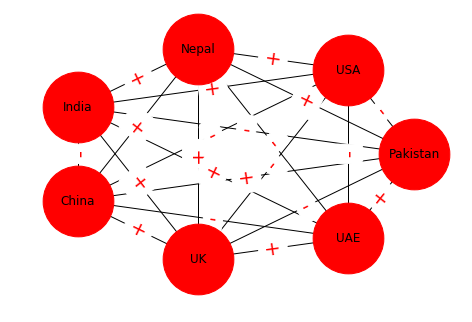

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

# 1. Create graph with n nodes(countries)
G = nx.Graph()
n = 7
G.add_nodes_from([i for i in range(1, n+1)])
mapping = {1:"India", 2:"Pakistan", 3:"China", 4:"USA", 5:"UK", 6:"UAE", 7:"Nepal", 8:"Bhutan", 9:"Canada", 10:"Spain"}
G = nx.relabel_nodes(G, mapping)#dict of old and new lane

# 2. Mak it a complete graph
signs = ['+', '-']
for i in G.nodes():
    for j in G.nodes():
        if i != j:
            G.add_edge(i, j, sign = random.choice(signs))
            
# 3. Display the network
edge_labels = nx.get_edge_attributes(G, 'sign')
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1, node_size=5000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=20)
plt.show()           
            

In [2]:
def get_signs_of_tris(tris_list, G):
    #I/P : tris_list = [[1,2,3], [4,5,2], ....]
    #O/P : all_signs = [['+','-','-'], [..],....]
    all_signs = []
    for i in tris_list:
        temp = []
        temp.append(G[i[0]][i[1]]['sign'])
        temp.append(G[i[1]][i[2]]['sign'])
        temp.append(G[i[2]][i[0]]['sign'])
        all_signs.append(temp)
    return all_signs
                    
def count_unstable(all_signs):
    unstable = 0
    stable = 0
    for i in all_signs:
        plus_cnt = i.count('+')
        if plus_cnt == 2 or plus_cnt == 0:
            unstable += 1
        else:
            stable += 1
    print 'Number of stable traingle out of ', stable+unstable, ' are ', stable
    print 'Number of unstable traingle out of ', stable+unstable, ' are ', unstable
    return unstable
                    
                    
# 4.1 Get a list of all triangle in the network
nodes = G.nodes()
tris_list = [list(x) for x in itertools.combinations(nodes, 3)]

# 4.2 Store the sign details of all the triangles
all_signs = get_signs_of_tris(tris_list, G)#[['+', '-', '-'], [..], [..], ...]

# 4.3 Count the number of unstable triangles
unstable = count_unstable(all_signs)
unstable_track = [unstable]

Number of stable traingle out of  35  are  16
Number of unstable traingle out of  35  are  19


## Lec71 : +ve and -ve Relationships : Moving a network from unstable to stable state

In [3]:
# 5. While the number if unstable traingles is non zero
# 5.1 Choose a triangle that is unstable
# 5.2 Make that triangle stable
# 5.3 Count the number of unstable triangles
def move_a_tri_to_stable(G, tris_list, all_signs):
    found_unstable = False
    while found_unstable == False:
        index = random.randint(0, len(tris_list)-1)
        if all_signs[index].count('+') == 2 or all_signs[index].count('+') == 0:
            found_unstable = True
        else:
            continue
            
    #Move the unstable triangle to the stable state
    #[1, 2, 3]
    r = random.randint(1, 3)
    if all_signs[index].count('+') == 2:
        if r == 1:
            if G[tris_list[index][0]][tris_list[index][1]]['sign'] == '+':
                G[tris_list[index][0]][tris_list[index][1]]['sign'] = '-'
            elif G[tris_list[index][0]][tris_list[index][1]]['sign'] == '-':
                G[tris_list[index][0]][tris_list[index][1]]['sign'] = '+'
        elif r == 2:
            if G[tris_list[index][1]][tris_list[index][2]]['sign'] == '+':
                G[tris_list[index][1]][tris_list[index][2]]['sign'] = '-'
            elif G[tris_list[index][1]][tris_list[index][2]]['sign'] == '-':
                G[tris_list[index][1]][tris_list[index][2]]['sign'] = '+'
        elif r == 3:
            if G[tris_list[index][2]][tris_list[index][0]]['sign'] == '+':
                G[tris_list[index][2]][tris_list[index][0]]['sign'] = '-'
            elif G[tris_list[index][2]][tris_list[index][0]]['sign'] == '-':
                G[tris_list[index][2]][tris_list[index][0]]['sign'] = '+'
    elif all_signs[index].count('+') == 0:
        if r == 1:
            G[tris_list[index][0]][tris_list[index][1]]['sign'] = '+'
        elif r == 2:
            G[tris_list[index][0]][tris_list[index][1]]['sign'] = '+'
        elif r == 3:
            G[tris_list[index][0]][tris_list[index][1]]['sign'] = '+'
        
    return G
    

while unstable != 0:
    G = move_a_tri_to_stable(G, tris_list, all_signs)
    all_signs = get_signs_of_tris(tris_list, G)
    print all_signs
    unstable = count_unstable(all_signs)
    unstable_track.append(unstable)
    

[['-', '+', '+'], ['-', '+', '-'], ['-', '-', '+'], ['-', '-', '-'], ['-', '-', '+'], ['+', '+', '-'], ['+', '+', '+'], ['+', '+', '-'], ['+', '-', '+'], ['-', '-', '+'], ['-', '+', '-'], ['-', '-', '+'], ['+', '+', '-'], ['+', '-', '+'], ['-', '+', '+'], ['+', '+', '+'], ['+', '+', '-'], ['+', '+', '-'], ['+', '-', '-'], ['+', '-', '-'], ['+', '+', '-'], ['+', '-', '-'], ['-', '+', '-'], ['-', '-', '-'], ['-', '+', '-'], ['+', '-', '+'], ['+', '+', '+'], ['+', '-', '-'], ['+', '+', '+'], ['+', '-', '-'], ['+', '+', '-'], ['-', '+', '+'], ['-', '-', '-'], ['+', '+', '-'], ['+', '+', '-']]
Number of stable traingle out of  35  are  17
Number of unstable traingle out of  35  are  18
[['-', '+', '-'], ['-', '+', '-'], ['-', '-', '+'], ['-', '-', '-'], ['-', '-', '+'], ['-', '+', '-'], ['-', '+', '+'], ['-', '+', '-'], ['-', '-', '+'], ['-', '-', '+'], ['-', '+', '-'], ['-', '-', '+'], ['+', '+', '-'], ['+', '-', '+'], ['-', '+', '+'], ['+', '+', '+'], ['+', '+', '-'], ['+', '+', '-'], ['+

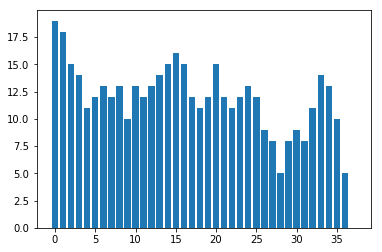

In [4]:
plt.bar([i for i in range(len(unstable_track))], unstable_track)
plt.show()

## Lec72 : +ve and -ve Relationships : Forming two coalitions



Random :  USA
['USA', 'Pakistan', 'Nepal', 'India', 'China', 'UK']
['UAE']


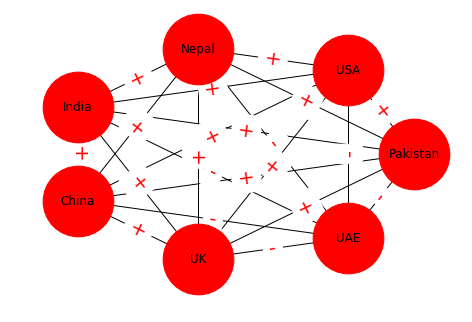

In [5]:
# 6. Now there is no unstable triangle
# 6.1. Choose the random node. Add it to the first coalition
# 6.2. Put all the friends of this node in the same coalition
# 6.3. Put all the enemies in the othe coaltion
# 6.4. Repeat the above two steps for all the unprocessed nodes

def see_coalitions(G):
    first_coalition = []
    second_coalition = []
    
    nodes = G.nodes()
    r = random.choice(nodes)
    print "Random : ", r
    
    first_coalition.append(r)
    
    processed_nodes = []
    to_be_processed = [r]
    
    for each in to_be_processed:
        if each not in processed_nodes:
            neigh = G.neighbors(each)
            
            for i in range(len(neigh)):
                if G[each][neigh[i]]['sign'] == '+':
                    if neigh[i] not in first_coalition:
                        first_coalition.append(neigh[i])
                    if neigh[i] not in to_be_processed:
                        to_be_processed.append(neigh[i])
                elif G[each][neigh[i]]['sign'] == '-':
                    if neigh[i] not in second_coalition:
                        second_coalition.append(neigh[i])
                        processed_nodes.append(neigh[i])
                        
            processed_nodes.append(each)
    return first_coalition, second_coalition
                        
first, second = see_coalitions(G)
print first
print second

# 3. Display the network
edge_labels = nx.get_edge_attributes(G, 'sign')
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1, node_size=5000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=20)
plt.show()    

## Lec73 : +ve and -ve Relationships : Forming two coalitions (continued)



In [6]:
# Explanation of see coalitions functions

## Lec74 : +ve and -ve Relationships : Displaying the network with two coalitions

{('Nepal', 'China'): '+', ('India', 'China'): '+', ('Pakistan', 'UK'): '+', ('China', 'UK'): '+', ('Pakistan', 'India'): '+', ('USA', 'Nepal'): '+', ('USA', 'UAE'): '-', ('Nepal', 'UAE'): '-', ('Nepal', 'UK'): '+', ('UK', 'UAE'): '-', ('USA', 'China'): '+', ('China', 'UAE'): '-', ('Pakistan', 'USA'): '+', ('Pakistan', 'UAE'): '-', ('USA', 'UK'): '+', ('USA', 'India'): '+', ('Pakistan', 'Nepal'): '+', ('Nepal', 'India'): '+', ('India', 'UK'): '+', ('Pakistan', 'China'): '+', ('India', 'UAE'): '-'}


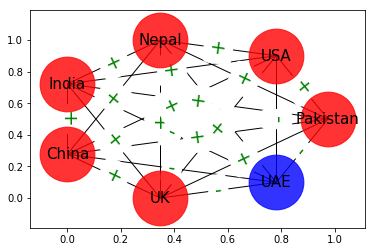

In [7]:
#raw_input()
edge_labels = nx.get_edge_attributes(G, 'sign')
print edge_labels
# 7. Display the network with coalitions
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = first, node_color = 'red', node_size = 3000, alpha = 0.8)
nx.draw_networkx_nodes(G, pos, nodelist = second, node_color = 'blue', node_size = 3000, alpha = 0.8)

nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 20, font_color= 'green')
plt.show()